# Transfer Analysis

In [2]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_path = "/Users/apeksha/Desktop/Xtillion_Venmito/Venmito-apekshamalik/output_data/transfers_(linked).csv"
transfers_df = pd.read_csv(file_path)

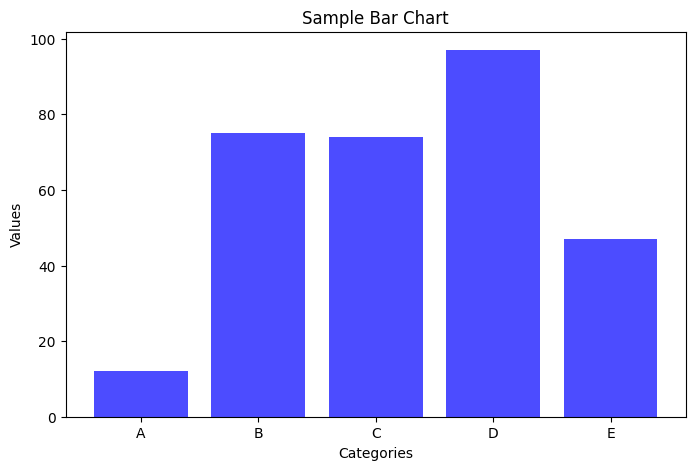

In [4]:


# Generate random sample data
categories = ['A', 'B', 'C', 'D', 'E']
values = np.random.randint(10, 100, size=5)

# Create a simple bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='blue', alpha=0.7)
plt.title("Sample Bar Chart")
plt.xlabel("Categories")
plt.ylabel("Values")
plt.show()


In [5]:

# Sample Data (Replace with your actual DataFrame)
# transfers_df = pd.read_csv("transfers.csv")

# Dropdown for selecting a sender country
sender_dropdown = widgets.Dropdown(
    options=transfers_df['sender_country'].unique(),
    description="Sender Country",
    value=transfers_df['sender_country'].unique()[0]
)

def update(sender_country):
    filtered_df = transfers_df[transfers_df['sender_country'] == sender_country]
    summary = filtered_df.groupby('recipient_country')['amount'].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 5))
    summary.plot(kind='bar', color='blue', alpha=0.7)
    plt.title(f"Total Amount Sent from {sender_country}")
    plt.ylabel("Amount Transferred")
    plt.xlabel("Recipient Country")
    plt.xticks(rotation=45)
    plt.show()

# Display the interactive dropdown
interactive_plot = widgets.interactive(update, sender_country=sender_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Sender Country', options=('USA', 'Canada', 'United Kingdom', 'Unkn…